$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE - Fall 2025}\\\\
\textit{Center for Data Science, New York University} \\\\
\textit{September 5, 2025}\\\\\
\text{ Prepared by: Vivek Kumar Agarwal}\\\\
\textbf{Recitation 1: Introduction to Probability}
\end{array}
$$

# Introduction - (Based on Lec 1 \& 2)

![Causal Inference](../figures/CI_lab1_image1.png)

## Today's Recitation 

- Introductions and Reviews
- Expectations from Recitations
- Random variables, PMF, PDF, CDF, Expectation, Variance.
- Descriptive vs Causal Questions
- All Causes Model
- Lets Code!!



## Desiderata

+ Python installation instructions can be found [here](https://realpython.com/installing-python/).

+ Jupyter installation instructions can be found [here](https://jupyter.org/install).

+ For NYU's High Performance Computing ([NYU HPC](https://sites.google.com/nyu.edu/nyu-hpc)).

+ May also use [Google Colab](https://colab.research.google.com/).




#### Refresher on Random Variables

#### What is a random variable?

+ A random variable is a function that maps from a sample space to a set of real numbers.

+ A random variable can be discrete or continuous.

##### Discrete vs Continuous Random Variables

+ A discrete random variable can take on a countable number of values. For example, the number of heads in 10 coin flips.

    - The probability mass function (PMF) of a discrete random variable is the probability that the random variable takes on a particular value. For example, the probability that the number of heads in 10 coin flips is 5.

    - The cumulative distribution function (CDF) of a discrete random variable is the probability that the random variable takes on a value less than or equal to a particular value. For example, the probability that the number of heads in 10 coin flips is less than or equal to 5.

    - The expected value of a discrete random variable is the sum of the product of each value and its probability. For example, the expected number of heads in 10 coin flips is 5.

    - The variance of a discrete random variable is the expected value of the squared difference between the random variable and its expected value. For example, the variance of the number of heads in 10 coin flips is 2.5.

    - The standard deviation of a discrete random variable is the square root of the variance. For example, the standard deviation of the number of heads in 10 coin flips is 1.58.

    - Some examples of distributions for discrete random variables are the binomial distribution, the Poisson distribution.

+ A continuous random variable can take on an uncountable number of values. For example, the height of a person in a population.

    - The probability density function (PDF) of a continuous random variable is the probability that the random variable takes on a value in a particular interval. For example, the probability that the height of a person in a population is between 5 and 6 feet.

    - The cumulative distribution function (CDF) of a continuous random variable is the probability that the random variable takes on a value less than or equal to a particular value. For example, the probability that the height of a person in a population is less than or equal to 5 feet.

    - The expected value of a continuous random variable is the integral of the product of the random variable and its probability density function. For example, the expected height of a person in a population is 5.5 feet.

    - The variance of a continuous random variable is the expected value of the squared difference between the random variable and its expected value. For example, the variance of the height of a person in a population is 0.25.

    - The standard deviation of a continuous random variable is the square root of the variance. For example, the standard deviation of the height of a person in a population is 0.5.

    - Some examples of distributions for continuous random variables are the Gaussiann/Normal distribution, the exponential distribution.

## Function of Random Variables

+ Function of random variables is a random variable.

\begin{align*}
E[g(X)]=\int_{-\infty}^{\infty} g(x) f(x) d x
\end{align*}

## Expectation 

+ Discrete case:
\begin{align*}
E[X] = \sum_{i} x_i \cdot P(X = x_i)
\end{align*}

+ Continuous case:
\begin{align*}
E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx
\end{align*}

where $f(x)$ is the probability density function.

+ Some Basic properties of Expectation:
    + Linearity: $E[aX + bY] = aE[X] + bE[Y]$
    + Expectation of a Constant: $E[c] = c$ for any constant $c$
    + For Independent Variables: $E[XY] = E[X]E[Y]$




## Variance

\begin{align*}
E\left[(X-E[X])^2\right] & =E\left[X^2-2 X E[X]+E[X]^2\right] \\
& =E\left[X^2\right]-E[2 X E[X]]+E[X]^2 \\
& =E\left[X^2\right]-2 E[X] E[X]+E[X]^2 \\
& =E\left[X^2\right]-E[X]^2
\end{align*}


## Lets Code and understand --PMF vs PDF

#### First we look at PMF !!

In [31]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns

In [ ]:
def pmf_die(x: int) -> float:
    """Probability mass function for a fair six sideddie."""
    if x in [1, 2, 3, 4, 5, 6]:
        return 1/6
    else:
        return 0.0

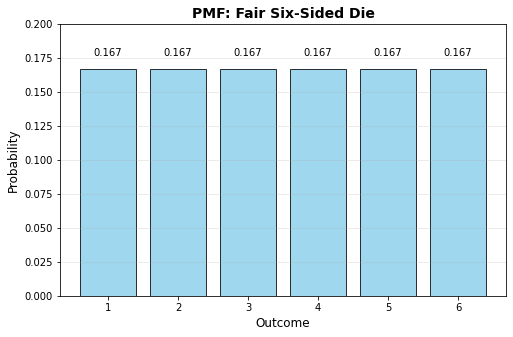

In [ ]:
# Plot PMF
plt.figure(figsize=(8, 5))
outcomes = np.arange(1, 7)
probabilities = [pmf_die(x) for x in outcomes]

plt.bar(outcomes, probabilities, color='skyblue', alpha=0.8, edgecolor='black')
plt.title('PMF: Fair Six-Sided Die', fontsize=14, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

for i, prob in enumerate(probabilities):
    plt.text(outcomes[i], prob + 0.01, f'{prob:.3f}', ha='center', fontsize=10)

plt.ylim(0, 0.2)
plt.show()

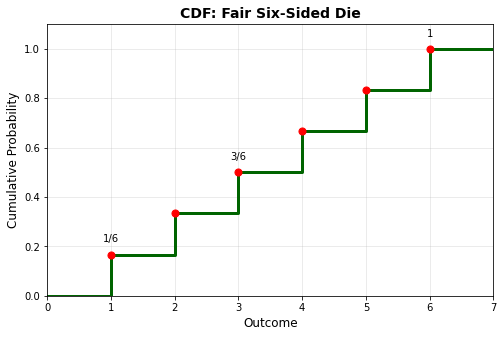

In [ ]:
def cdf_die(x: int) -> float:
    """Cumulative distribution function for a fair six-sided die."""
    if x < 1:
        return 0.0
    elif x >= 6:
        return 1.0
    else:
        return int(x) / 6

# Plot CDF
plt.figure(figsize=(8, 5))
x_values = np.arange(0, 8)
cdf_values = [cdf_die(x) for x in x_values]

plt.step(x_values, cdf_values, where='post', linewidth=3, color='darkgreen')
plt.scatter([1,2,3,4,5,6], [1/6, 2/6, 3/6, 4/6, 5/6, 1.0], 
           color='red', s=50, zorder=5)

plt.title('CDF: Fair Six-Sided Die', fontsize=14, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.grid(True, alpha=0.3)

plt.text(1, 1/6 + 0.05, '1/6', ha='center', fontsize=10)
plt.text(3, 3/6 + 0.05, '3/6', ha='center', fontsize=10)
plt.text(6, 1.0 + 0.05, '1', ha='center', fontsize=10)

plt.xlim(0, 7)
plt.ylim(0, 1.1)
plt.show()

#### Lets look at PDF !!

The Gaussian probability density function is given by:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Where:
- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $x$ is the input value

In [9]:
def pdf_gaussian(x, mu, sigma):
    """
    Probability density function for a Gaussian/normal distribution.
    """
    # mu, sigma = 0, 1  # mean and standard deviation for a standard normal distribution
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

#### Simulate Data for height of people 

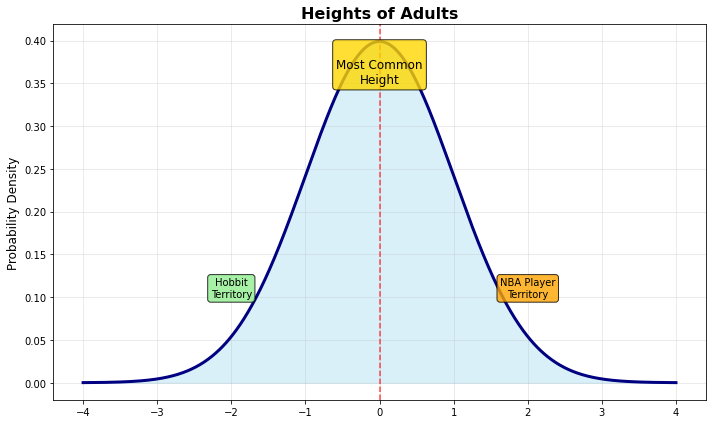

In [19]:
plt.figure(figsize=(10, 6))

# The data
x = np.linspace(-4, 4, 1000)
y = pdf_gaussian(x, 0, 1)

# The plot
plt.plot(x, y, linewidth=3, color='navy', label=' Gaussian Distribution')
plt.fill_between(x, y, alpha=0.3, color='skyblue')
plt.grid(True, alpha=0.3)

plt.title('Heights of Adults', fontsize=16, fontweight='bold')
plt.ylabel('Probability Density', fontsize=12)

# Mark the sweet spots
plt.axvline(0, color='red', linestyle='--', alpha=0.7)
plt.text(0, 0.35, '\nMost Common\nHeight', ha='center', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

plt.text(2, 0.1, 'NBA Player\nTerritory', ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))

plt.text(-2, 0.1, 'Hobbit\nTerritory', ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

#### Lets calculate the CDF

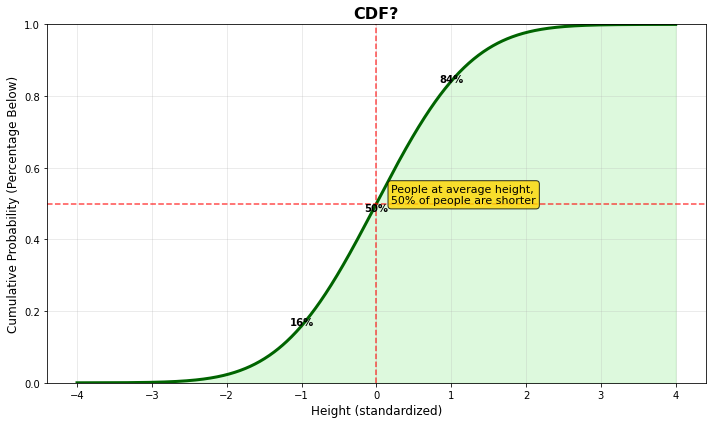

In [ ]:
plt.figure(figsize=(10, 6))

# Generate CDF data
#x = np.linspace(-4, 4, 1000) as simulated in above code block
y_cdf = norm.cdf(x, 0, 1)

# Plot CDF
plt.plot(x, y_cdf, linewidth=3, color='darkgreen', label='Cumulative Distribution')
plt.fill_between(x, y_cdf, alpha=0.3, color='lightgreen')
plt.grid(True, alpha=0.3)

plt.title('CDF?', fontsize=16, fontweight='bold')
plt.xlabel('Height (standardized)', fontsize=12)
plt.ylabel('Cumulative Probability (Percentage Below)', fontsize=12)


plt.axhline(0.5, color='red', linestyle='--', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', alpha=0.7)


plt.text(0.2, 0.5, 'People at average height,\n50% of people are shorter', 
         ha='left', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))


plt.text(-1, 0.16, '16%', fontsize=10, ha='center', weight='bold')
plt.text(0, 0.48, '50%', fontsize=10, ha='center', weight='bold')
plt.text(1, 0.84, '84%', fontsize=10, ha='center', weight='bold')


plt.ylim(0, 1)
plt.tight_layout()
plt.show()

---

## The All Causes Model 


## Descriptive vs Causal Questions??

+ Descriptive Questions -  Describe what is happening (correlation, patterns, associations)
    + How does student performance vary by class size?
    + Are coffee drinkers more likely to work late hours?

+ Causal Questions - Determine if one thing causes another (intervention effects)
    + Do smaller class sizes improve student performance?
    + Does drinking coffee cause people to work late hours?

    

#### We understand with a case study: 

+ A professor is on a mission to find out if attending classes regularly really gives students that extra grade boost. He's not just interested in *describing* what's happening he wants to figure out the *effect* of attendance on grades. 

**How do we go from simply observing grades to truly understanding *what causes* better performance?**

### Notation
Let

$$Y_i(s, u)$$

represent the outcome of interest: grades for student $i$ under potential state $s$ and given all other factors $u$.
- **$s$**: A potential state of the world, such as regularly attending classes ($s = 1$) or attending irregularly ($s = 0$).
- **$u$**: All other factors that might influence grades, like study habits, prior knowledge, or motivation.

### Descriptive Analysis


Let us simulate grades based on a normal distribution. This allows us to later analyze how attendance impacts these grades.



In [29]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Parameters
students = 1000
mean_grade = 75
std_grade = 12

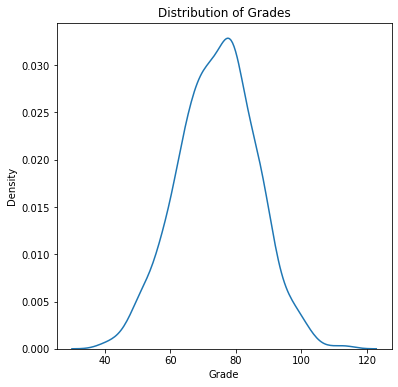

In [33]:
# Simulate attendance and grades
grades = np.random.normal(mean_grade, std_grade, students)
attendance = np.random.binomial(1, 0.6, students)
grades = pd.DataFrame({
    'Grade': grades,
    'Attendance': attendance
})

# Plot
plt.figure(figsize=(6, 6))
sns.kdeplot(grades['Grade'])
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.show()

We begin by examining the current state of the world, focusing on a straightforward descriptive question: **What is the average grade in this course?** Notice, here we are not distinguishing between different attendance patterns — our goal is to simply describe the grades as they are:

- **_Current State ($s$):_** This represents the actual, observed state of the world where students have varied levels of attendance, but we are not yet separating them into “regular” or “irregular” attendance categories.
  
- **_Outcome ($Y_i(s, u)$):_** The grade $Y_i$ for student $i$ given their current attendance pattern $s$ and other influencing factors $u$.

To calculate the average grade, we observe:

\begin{aligned}
\mathbb{E}[Y] = \frac{1}{N} \sum_{i=1}^N Y_i(s, u)
\end{aligned}


where:
- $N: \text{is the number of students.}$
- $s$ is the current attendance status for each student (which varies but is not yet isolated into specific patterns).
- $u$ includes other relevant factors like study habits, prior knowledge, and motivation.

In [34]:
grades.head(5)

,Grade,Attendance
0,98.044410,0
1,60.325260,1
2,75.855045,0
3,59.477908,1
4,66.651661,0


In [35]:
print(f"Average grade in the course is {grades['Grade'].mean():.2f}.")

Average grade in the course is 74.27.


**Can we now answer what is the effect of attendance on grades? Not yet! Why?** Even though we've got some insights from our descriptive analysis, there's a big issue we can't overlook: we're only seeing each student in **one attendance scenario** — either regular or irregular.

We have no idea what would happen to their grades if they switched their attendance pattern! This missing information —**the counterfactual**— is exactly what makes causal inference so tricky and it's known as **the fundamental problem of causal inference**.


### From Descriptive to Causal Analysis in a Perfect World (For Now)

Assumptions:

1. **Perfect Knowledge of Both States:** We can observe both regular $Y_i(1, u)$ and irregular attendance $Y_i(0, u)$ grades for every student — something that's impossible in the real world.
2. **No Confounding Factors:** Attendance is the only factor affecting grades, which may not be true in reality.
3. **Random Assignment:** Attendance can simulated as being randomly assigned, avoiding biases often seen in real-world settings.

Given our “perfect world”, **Average Treatment Effect (ATE)** is defined as:

$$
\text{ATE} = \mathbb{E}[Y_i(1, u)] - \mathbb{E}[Y_i(0, u)].
$$


## Lets code and see !!

In [37]:
# Simulations
attend_effect = 10
attendance = np.random.binomial(1, 0.5, students)
grades = grades['Grade']
grades_attend = grades + attendance * attend_effect
grades_nattend = grades

# Create DataFrame
attend = pd.DataFrame({
    'Student_ID': np.arange(1, students + 1),
    'Attendance': attendance,
    'Grade_With_Attendance': grades_attend,
    'Grade_Without_Attendance': grades_nattend
})


In [38]:
attend.head(5)

,Student_ID,Attendance,Grade_With_Attendance,Grade_Without_Attendance
0,1,1,108.044410,98.044410
1,2,1,70.325260,60.325260
2,3,0,75.855045,75.855045
3,4,1,69.477908,59.477908
4,5,1,76.651661,66.651661


In [39]:
attend.describe()

,Student_ID,Attendance,Grade_With_Attendance,Grade_Without_Attendance
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.482000,79.089704,74.269704
std,288.819436,0.499926,12.735791,11.798779
min,1.000000,0.000000,38.908412,38.908412
25%,250.750000,0.000000,70.348702,66.248950
50%,500.500000,0.000000,79.149693,74.520596
75%,750.250000,1.000000,87.859317,82.046758
max,1000.000000,1.000000,122.824681,113.917116


In [43]:
#help(attend.describe())

In [44]:
# Calculate average grades for each state
avg_reg = attend['Grade_With_Attendance'].mean()
avg_irr = attend['Grade_Without_Attendance'].mean()

# Calculate the causal effect
ate = avg_reg - avg_irr

# Output results
print(f"Average grade with regular attendance: {avg_reg:.2f}")
print(f"Average grade with irregular attendance: {avg_irr:.2f}")
print(f"Regular attendance improves grades by {ate:.2f} points.")



Average grade with regular attendance: 79.09
Average grade with irregular attendance: 74.27
Regular attendance improves grades by 4.82 points.


Text(1.15, 89.08970427388714, 'ATE: 4.82 points')

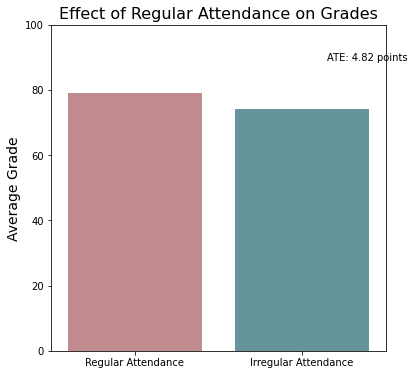

In [45]:
# Plotting
labels = ['Regular Attendance', 'Irregular Attendance']
values = [avg_reg, avg_irr]
plt.figure(figsize=(6, 6))
sns.barplot(
    x=labels, y=values, hue=labels, palette = ['#c98389','#5c9ba4'], legend=False
    )
plt.title('Effect of Regular Attendance on Grades', fontsize=16)
plt.ylabel('Average Grade', fontsize=14)
plt.ylim(0, 100)
plt.annotate(
    f'ATE: {ate:.2f} points', xy=(0.95, avg_reg), xytext=(1.15, avg_reg + 10)
    )


## Office Hours Monday 3PM - 4PM  Room No - 244
or dropin your questions at vka244@nyu.edu
